# Import Libraries

In [2]:
import numpy as np
import pandas as pd
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import math

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Context:

A large e-commerce company has contracted us to provide delivery services from several of their warehouses(or sites) to customers' doorsteps at several locations across the country.

The dataset contains information about the performance of our delivery agents working at our client's sites across cities in India.

The idea of this exercise is to gain insights into their performance and make data driven strategic recommendations for imporvement.

***NOTE: The dataset contains information for only one month, i.e June 2023***

# Features in the Dataset
* Site Code - A unique ID belonging to the site at which our delivery agents work.
* City - Name of the city in which the site is located.
* Vehicle Type - "Van DCD" means the delivery agent drives his own van and delivers packages. "Bike" means the delivery agent rides his own bike and delivers packages. "Van D+DA" means the delivery agent doesn't drive, but is instead driven around the city by a van driver.
* Cluster - Cities are grouped into clusters based on certain characteristics.
* Date - The date that the delivery agent reported for work.
* Delivery Agent ID - A unique identifier assigned to each delivery agent who works with us.
* Shift - "A" indicates morning, "B" indicates afternoon, "C" indicates evening.
* Unsuccessful_Attempts - The number of packages that the delivery agent attempted to deliver, but the delivery was not possible for various reasons
* Process_Deviations - The number of times the delivery agent deviated from the process during the shift.
* Delivered - The number of packages that the delivery agent delivered during the shift.
* Customer_Rejects - The number of packages that customers rejected when the delivery agent went to deliver them.
* Picked_up_Customer_Returns - The number of packages the delivery agent picked up from customers who wanted to return something that they had ordered earlier.
* Picked_up_Seller - The number of packages that the delivery agent picked up from sellers on the platform. These packages would be sent out for delivery to customers the next day.
* billing_amt - The amount that we bill our clients for the services rendered by our delivery agents.


# Question 1

Load the dataset into a dataframe and name it "daily_df". Display a sample of 10 random rows, display the shape of the dataset, the datatypes of each column, and check for missing values.

### 1.1 Loading Data Set

In [3]:
daily_df = pd.read_excel('Python Ninja - Advanced - Dataset.xlsx')

### 1.2 Display 10 Rows

In [4]:
daily_df.head(10)

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,A,0,0,3,1,26,0,955
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,A,0,9,60,1,20,0,2075
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,C,2,0,15,0,2,0,571
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,B,1,0,15,0,0,0,1275
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,B,5,0,40,1,0,0,1353
5,Site_3,BANGALORE,Van DCD,4,2023-06-24,DA_36,B,0,0,22,0,0,0,1429
6,Site_19,HYDERABAD,Bike,4,2023-06-05,DA_295,C,2,0,29,0,2,0,613
7,Site_27,MUMBAI,Bike,3,2023-06-08,DA_224,A,2,0,13,0,31,0,933
8,Site_23,CHENNAI,Bike,3,2023-06-23,DA_686,A,0,0,0,0,31,0,907
9,Site_16,BANGALORE,Bike,4,2023-06-23,DA_569,B,3,0,34,0,2,0,772


### 1.3 Shape of Data Set

In [5]:
daily_df.shape

(11279, 14)

- The dataset has 14 variables and 11,279 records

### 1.4 Data types of each column

In [6]:
daily_df.dtypes

Site Code                             object
city                                  object
Vehicle_type                          object
cluster                                int64
Date                          datetime64[ns]
Delivery Agent ID                     object
Shift                                 object
Unsuccessful_Attempts                  int64
Process_Deviations                     int64
Delivered                              int64
Customer_Rejects                       int64
Picked_up_Customer_Returns             int64
Picked up_Seller                       int64
billing_amt                            int64
dtype: object

- There are 5 object type variable (site code, city, vihicle_type, Delivery Agent ID, Shifts)
- There are 8 integer type variables (Unsuccessful_Attempts, Process_Deviations, Delivered, Customer_Rejects, Picked_up_Customer_Returns, Picked up_Seller, billing_amt)
- There is one date time variable Date
- **All the variables are in proper data types as per the business context so no need of any data type conversions**

### 1.5 Checking missing values

In [7]:
daily_df.isnull().sum()

Site Code                     0
city                          0
Vehicle_type                  0
cluster                       0
Date                          0
Delivery Agent ID             0
Shift                         0
Unsuccessful_Attempts         0
Process_Deviations            0
Delivered                     0
Customer_Rejects              0
Picked_up_Customer_Returns    0
Picked up_Seller              0
billing_amt                   0
dtype: int64

- **There are no null values for any variable in the dataset. Hence no need of treating null values**

## 👉 Self Analysis

Context:
   - There is a package delivery company which is working across **multiple cities** in India and having **multiple delivery agents** delivering the packages to **differents sites** in different **clusters** of the cities and using **three vehicles** in **three shifts** and the data is given for **30 days**. 
   - out of all assigned to a particular delivery agent there will be **successful deliveries**, **unsuccessful attempts**, delivered but **rejected by customers**, **returns picked from customers**, **picked up from sellers**, **process deviations**, **billing amount** for those orders delivered successfully.  
   - out of all these infomration i need to perform data analysis and provide insight to make strategic decisions. 

In [11]:
daily_df['Date'].unique().min(),  daily_df['Date'].unique().max()

(numpy.datetime64('2023-06-01T00:00:00.000000000'),
 numpy.datetime64('2023-06-30T00:00:00.000000000'))

In [14]:
daily_df['Site Code'].unique()

array(['Site_22', 'Site_10', 'Site_3', 'Site_4', 'Site_19', 'Site_27',
       'Site_23', 'Site_16', 'Site_17', 'Site_13', 'Site_6', 'Site_18',
       'Site_14', 'Site_7', 'Site_29', 'Site_15', 'Site_5', 'Site_2',
       'Site_26', 'Site_21', 'Site_9', 'Site_12', 'Site_28', 'Site_24',
       'Site_1', 'Site_11', 'Site_25', 'Site_30', 'Site_20', 'Site_8'],
      dtype=object)

In [24]:
daily_df['Picked up_Seller'].unique()

array([0], dtype=int64)

In [15]:
daily_df.describe(include=object)

,Site Code,city,Vehicle_type,Delivery Agent ID,Shift
count,11279,11279,11279,11279,11279
unique,30,8,3,696,3
top,Site_22,BANGALORE,Bike,DA_34,A
freq,1143,4928,6007,28,5129


In [ ]:
Site Code                     : 'Site_22', 'Site_10', 'Site_3', 'Site_4', 'Site_19', 'Site_27',
                                'Site_23', 'Site_16', 'Site_17', 'Site_13', 'Site_6', 'Site_18',
                                'Site_14', 'Site_7', 'Site_29', 'Site_15', 'Site_5', 'Site_2',
                                'Site_26', 'Site_21', 'Site_9', 'Site_12', 'Site_28', 'Site_24',
                                'Site_1', 'Site_11', 'Site_25', 'Site_30', 'Site_20', 'Site_8'.
                    
city                          : 'HYDERABAD', 'BANGALORE', 'MUMBAI', 'CHENNAI', 'DELHI', 'THANE', 'BHOPAL', 'PUNE'
Vehicle_type                  : Bike, Van DD, Van DD+DA
cluster                       : 1, 3, 4, 5, 6 clusters
Date                          : (01-06-2023) to (30-06-2023)
Delivery Agent ID             : 696 Delivery agents
Shift                         : A, B, C

#### Bhopal 
    - Bhopal has clusters - 1 (cluster_01)
    - Site codes - 2 (site_01, site_02)
#### Banglore
    - Banglore has cluster - 1 (cluster_04)
    - Site codes - 11 (site_03, site_04, site_05, site_06, site_07, site_08, site_09, site_10, site_11, site_15, site_16, site_02.

In [ ]:
Unsuccessful_Attempts         0
Process_Deviations            0
Delivered                     0
Customer_Rejects              0
Picked_up_Customer_Returns    0
Picked up_Seller              0
billing_amt  

In [22]:
daily_df.groupby(by = ['city','cluster','Site Code']).sum()

Unsuccessful_Attempts  Process_Deviations  \
city      cluster Site Code                                              
BANGALORE 4       Site_10                     2078                1587   
                  Site_11                      181                 111   
                  Site_15                      596                  10   
                  Site_16                     2671                5873   
                  Site_3                      2840                 582   
                  Site_4                      1310                 650   
                  Site_5                      2357                 823   
                  Site_6                      1041                 465   
                  Site_7                       578                 144   
                  Site_8                         2                   1   
                  Site_9                       416                 638   
BHOPAL    1       Site_1                       175                  48   
                  Site_2                       727                 217   
CHENNAI   3       Site_23                        8                   2   
DELHI     6       Site_17                      525                 150   
                  Site_18                      814                 116   
                  Site_29                      878                 749   
HYDERABAD 4       Site_19                     1157                 499   
                  Site_20                       24                   0   
                  Site_21                     1942                1039   
                  Site_22                     2094                1712   
MUMBAI    3       Site_12                      328                 511   
                  Site_14                      302                 260   
                  Site_24                      193                 113   
                  Site_25                      528                  25   
                  Site_26                      239                 200   
                  Site_27                      588                 506   
                  Site_28                      163                   0   
          5       Site_12                      683                 183   
                  Site_14                      263                  14   
                  Site_24                      177                 142   
                  Site_25                      446                  14   
                  Site_26                      483                  32   
                  Site_27                     1234                 230   
PUNE      3       Site_30                       47                   2   
          4       Site_30                       24                   0   
THANE     3       Site_13                      383                 167   
          5       Site_13                      756                  45   

                             Delivered  Customer_Rejects  \
city      cluster Site Code                                
BANGALORE 4       Site_10        27325               416   
                  Site_11         9510                59   
                  Site_15         8889               256   
                  Site_16        45172              1059   
                  Site_3         26729               638   
                  Site_4         23421               633   
                  Site_5         16619              1274   
                  Site_6         29130               347   
                  Site_7          8791               212   
                  Site_8            94                 0   
                  Site_9          3567               215   
BHOPAL    1       Site_1          1922               173   
                  Site_2          8594               445   
CHENNAI   3       Site_23           35                 0   
DELHI     6       Site_17         8875              1011   
                  Site_18        13028          

# Question 2

**Part-A**

You will notice that there are delivery agents who have used different vehicle types in different shifts.

Find what vehicle type was used for majority of the shifts, then overwrite all the other minority values with the majority values.

For example - if DA_1 used a bike in 20 shifts and used a van in 2 shifts, you need to make sure that the "Vehicle Type" for all 22 shifts is set to "Bike" as that was used for majority of the shifts.

#### Solution

- To analyse the situation we need to find out info regarding 
    - How many delivery agents are there?
    - different vehicle types
    - number of shifts 

#### Delivery Agents 

In [590]:
len(daily_df['Delivery Agent ID'].unique())

696

- There are total 696 delivery agents working 

#### Vehicle types

In [591]:
daily_df['Vehicle_type'].unique()

array(['Bike', 'Van DCD', 'Van D+DA'], dtype=object)

- There only three types of vehicle being used Bike, Van DCD, Van D+DA

#### Number of Shits

In [592]:
daily_df['Shift'].unique()

array(['A', 'C', 'B'], dtype=object)

- There are three shifts covering 24 hrs of a day named as A,B,C in data set

#### Replacing the Vehicles of Delivery Agents with Max used vehicle

In [593]:
delivery_agents = daily_df['Delivery Agent ID'].unique()

In [594]:
Agent_Vehicle = {}

for i in delivery_agents:
    Most_Used_Vehicle = daily_df[daily_df['Delivery Agent ID']==i]['Vehicle_type'].mode()[0]
    Agent_Vehicle[i] = Most_Used_Vehicle

In [595]:
daily_df['Vehicle'] = daily_df['Delivery Agent ID'].map(Agent_Vehicle)
daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Vehicle
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,A,0,0,3,1,26,0,955,Bike
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,A,0,9,60,1,20,0,2075,Van DCD
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,C,2,0,15,0,2,0,571,Bike
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,B,1,0,15,0,0,0,1275,Van DCD
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,B,5,0,40,1,0,0,1353,Van DCD


**Part-B:**

Total assigned packages can be calculated using the following formula:

Total Assigned = Unsuccessful_Attempts + Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller

Use this formula and add a new column in the dataframe called "Total Assigned"

In [596]:
daily_df['Total Assigned'] = daily_df['Unsuccessful_Attempts']+daily_df['Delivered']+daily_df['Customer_Rejects']+daily_df['Picked_up_Customer_Returns']+daily_df['Picked up_Seller']

In [597]:
daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Vehicle,Total Assigned
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,A,0,0,3,1,26,0,955,Bike,30
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,A,0,9,60,1,20,0,2075,Van DCD,81
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,C,2,0,15,0,2,0,571,Bike,19
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,B,1,0,15,0,0,0,1275,Van DCD,16
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,B,5,0,40,1,0,0,1353,Van DCD,46


**Part-C:**

"Productivity" is a metric that aims at measuring how much work a delivery agent is doing during his shift. This can later be compared with the rest of the workforce to identify delivery agents who are both - outperforming as well as under performing.  

It can be calculated using the following formula:

Productivity = Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller.

Calculate "Productivity" and show it in a new column in the daily_df.


In [598]:
daily_df['Productivity'] = daily_df['Delivered']+daily_df['Customer_Rejects']+daily_df['Picked_up_Customer_Returns']+daily_df['Picked up_Seller']

In [599]:
daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Vehicle,Total Assigned,Productivity
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,A,0,0,3,1,26,0,955,Bike,30,30
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,A,0,9,60,1,20,0,2075,Van DCD,81,81
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,C,2,0,15,0,2,0,571,Bike,19,17
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,B,1,0,15,0,0,0,1275,Van DCD,16,15
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,B,5,0,40,1,0,0,1353,Van DCD,46,41


**Part-D:**

Analyze the data and report the ranges of productivity that different vehicle types have in different types of shifts. What are your observations?

#### Solution

- We have three different shifts namely A, B, C
- There are three different types of vehicles used for delivery Bike, Van DCD, Van D+DA

In [600]:
vehicle_productivity_data = daily_df[['Shift','Vehicle','Total Assigned','Productivity']]

In [601]:
vehicle_prod_summary = vehicle_productivity_data.groupby(['Vehicle','Shift']).sum()

In [602]:
vehicle_prod_summary = vehicle_prod_summary.T
vehicle_prod_summary

Vehicle           Bike               Van D+DA             Van DCD             
Shift                A      B      C        A      B    C       A      B     C
Total Assigned  106063  31155  70655    65394  32014  675  181093  55226  1140
Productivity    103008  28795  64005    62362  29013  638  174323  50964  1056

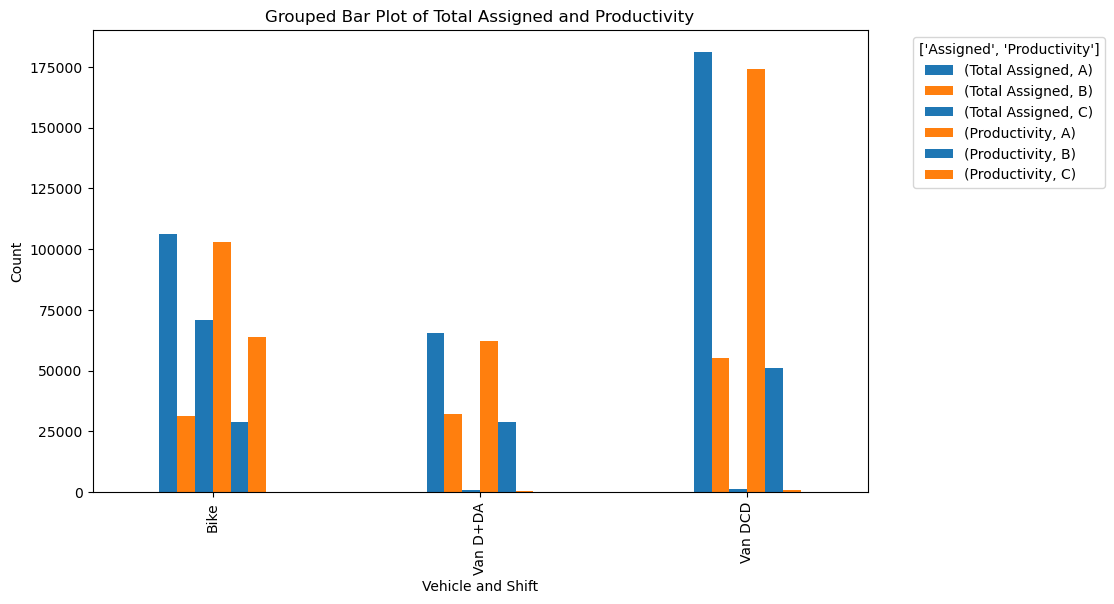

In [378]:
ax = vehicle_prod_summary.plot(kind='bar', width=0.4, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.xlabel('Vehicle and Shift')
plt.ylabel('Count')
plt.title('Grouped Bar Plot of Total Assigned and Productivity')

# Position the legend outside the plot for better visibility
plt.legend(title=['Assigned', 'Productivity'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

- We can see Van DCD can deliver high number od deliveries that any other vehicle type
- Productivity of all the vehicles in all the shift are similar. 
- Bikes perform more efficiently in all the shifts.
- Van DCD & Van D_DA has more deliveries done in the morning shift very less in the evening shifts

**Part E:**

Low productivity adversely affects both - service levels as well as unit level economics of the business. Curbing this is quintessential to running a good operation.

Now that you have a sense of the productivity levels of different vehicle types in each shift, use this information to formulate logic to classify all the samples across all shifts as either "productivity-ok" or "productivity-low". Add this information into a column called "Productivity Category".

* Keep in mind that the productivity of one vehicle type is not comparable to the other. A bike may travel faster when there is more traffic. A van may be able to carry a much larger number of packages, etc...

* Keep in mind that productivity from Shift A is not comparable to productivity from Shifts B or C or vice versa. Each shift should have it's own threshold for defining low productivity.

* Most importantly, keep in mind that the ideal solution would be to identify a smaller set of people who contribute to the largest part of the problem.

* You are not being given any specific formula here to do this. You will need to think creatively and also give an explanation of your method and why you chose to do things that way.

#### Solution

- If we see the plot of vehicle productivity, we can observe that almost all the vehicles are having morethan 90% of the productivity.
- So let's consider a level below this 80% as a benchmark to classify the records as high & low productivity. 
- morethan 80% is productivity-ok lessthan 80% is productivity-low

In [603]:
Productivity_Category = {}

for i in range(daily_df.shape[0]):
    prod = daily_df.loc[i]['Productivity']/daily_df.loc[i]['Total Assigned']
    if prod>0.80:
        Productivity_Category[i]='productivity-ok'
    else:
        Productivity_Category[i]='productivity-low'
    

In [604]:
daily_df['Productivity_Category'] = daily_df.index.map(Productivity_Category)
daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Vehicle,Total Assigned,Productivity,Productivity_Category
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,A,0,0,3,1,26,0,955,Bike,30,30,productivity-ok
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,A,0,9,60,1,20,0,2075,Van DCD,81,81,productivity-ok
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,C,2,0,15,0,2,0,571,Bike,19,17,productivity-ok
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,B,1,0,15,0,0,0,1275,Van DCD,16,15,productivity-ok
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,B,5,0,40,1,0,0,1353,Van DCD,46,41,productivity-ok


# Question 3

**Part A:**

The daily_df contains information of how each delivery agent performed on each day that they reported in June 2023. Create a new dataframe that summarizes the performance of each delivery agent for the entire month of June 2023, using the data from the daily_df.

Name this new dataframe "monthly_df".

The new dataframe should contain the following columns:
* Delivery Agent ID
* Vehicle Type
* Cluster
* City
* Site Code
* Shifts Worked
* Total Assigned
* Unsuccessful_Attempts
* Process_Deviations
* Productivity
* billing_amt

In [606]:
daily_df1 = daily_df

In [607]:
monthly_df = daily_df1.groupby(['Delivery Agent ID','Vehicle','cluster','city','Site Code','Shift']).sum().reset_index()
monthly_df.head()

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,190,0,16900,762,735
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,16,0,4223,212,199
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,14,0,2471,103,97
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,66,0,15819,524,475
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,7,0,10125,235,215


**Part B:**

"Delivery Success Rate(DSR)" is a metric that measures the quality of a delivery agent's work. If an angent has low DSR, it means that he/she would have a higher number of unsuccessful attempts.

DSR can be calculated using the following formula:

DSR = Productivity / Total Assigned.

Using this formula, calculate and add a new column called "DSR" in the monthly_df. Round the values to 2 decimal placecs.

In [608]:
monthly_df['DSR'] = round(monthly_df['Productivity']/monthly_df['Total Assigned'],2)

In [609]:
monthly_df.head(10)

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,DSR
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,190,0,16900,762,735,0.96
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,16,0,4223,212,199,0.94
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,14,0,2471,103,97,0.94
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,66,0,15819,524,475,0.91
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,7,0,10125,235,215,0.91
5,DA_100,Bike,4,HYDERABAD,Site_19,A,2,0,51,4,58,0,2911,115,113,0.98
6,DA_101,Van DCD,4,HYDERABAD,Site_19,A,84,1,1059,36,252,0,41087,1431,1347,0.94
7,DA_101,Van DCD,4,HYDERABAD,Site_19,B,5,1,19,0,6,0,1435,30,25,0.83
8,DA_102,Bike,4,HYDERABAD,Site_22,A,2,0,41,1,891,0,24241,935,933,1.00
9,DA_103,Van D+DA,3,MUMBAI,Site_12,C,2,1,35,4,4,0,1119,45,43,0.96


**Part C:**

The productivity in the monthly_df is an aggregate of the whole month's productivity. Create a new column called "Avg_Productivity" that contains the average productivity per shift of each delivery agent. The values in this column should be expressed as integers.

Do the same with Process_Deviations. Calculate the average number of deviations per shift worked and put it into a column called "Avg_Deviations". Here the values should be rounded to 2 decimal places

In [610]:
Avg_Prod = {}

for i in delivery_agents:
    count = monthly_df[monthly_df['Delivery Agent ID']==i]['Productivity'].count()
    Avgp = monthly_df[monthly_df['Delivery Agent ID']==i]['Productivity'].sum()/count
    Avg_Prod[i] = int(Avgp)

In [611]:
monthly_df['Avg_Prod'] = monthly_df['Delivery Agent ID'].map(Avg_Prod)
monthly_df

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,DSR,Avg_Prod
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,190,0,16900,762,735,0.96,343
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,16,0,4223,212,199,0.94,343
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,14,0,2471,103,97,0.94,343
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,66,0,15819,524,475,0.91,345
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,7,0,10125,235,215,0.91,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,DA_97,Van DCD,4,BANGALORE,Site_3,B,8,2,91,0,2,0,4341,101,93,0.92,737
1245,DA_98,Bike,3,THANE,Site_13,A,6,0,79,5,20,0,1898,110,104,0.95,104
1246,DA_99,Bike,3,MUMBAI,Site_14,C,27,6,70,7,24,0,2778,128,101,0.79,210
1247,DA_99,Bike,3,THANE,Site_13,A,33,0,383,38,90,0,9472,544,511,0.94,210


In [612]:
Avg_Dev = {}

for i in delivery_agents:
    count = monthly_df[monthly_df['Delivery Agent ID']==i]['Shift'].count()
    Avgd = monthly_df[monthly_df['Delivery Agent ID']==i]['Process_Deviations'].sum()/count
    Avg_Dev[i] = round(Avgd,2)

In [613]:
monthly_df['Avg_Dev'] = monthly_df['Delivery Agent ID'].map(Avg_Dev)
monthly_df

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,DSR,Avg_Prod,Avg_Dev
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,190,0,16900,762,735,0.96,343,11.67
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,16,0,4223,212,199,0.94,343,11.67
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,14,0,2471,103,97,0.94,343,11.67
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,66,0,15819,524,475,0.91,345,6.50
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,7,0,10125,235,215,0.91,345,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,DA_97,Van DCD,4,BANGALORE,Site_3,B,8,2,91,0,2,0,4341,101,93,0.92,737,61.00
1245,DA_98,Bike,3,THANE,Site_13,A,6,0,79,5,20,0,1898,110,104,0.95,104,0.00
1246,DA_99,Bike,3,MUMBAI,Site_14,C,27,6,70,7,24,0,2778,128,101,0.79,210,4.00
1247,DA_99,Bike,3,THANE,Site_13,A,33,0,383,38,90,0,9472,544,511,0.94,210,4.00


**Part D:**

Examine the distributions of the features in the monthly_df in both forms - tabular and plotted.

All columns that contain categorical information (data that has no ordinal value) should be shown as bar graphs. All columns that contain numerical data (data with ordinal value) should be shown as distribution curves or histograms.

State your observations and inferences.

In [614]:
monthly_df.dtypes

Delivery Agent ID              object
Vehicle                        object
cluster                         int64
city                           object
Site Code                      object
Shift                          object
Unsuccessful_Attempts           int64
Process_Deviations              int64
Delivered                       int64
Customer_Rejects                int64
Picked_up_Customer_Returns      int64
Picked up_Seller                int64
billing_amt                     int64
Total Assigned                  int64
Productivity                    int64
DSR                           float64
Avg_Prod                        int64
Avg_Dev                       float64
dtype: object

In [615]:
cat_col = monthly_df.select_dtypes(include='object')
cat_col.drop('Delivery Agent ID',axis=1,inplace=True)

In [616]:
cat_col.describe()

,Vehicle,city,Site Code,Shift
count,1249,1249,1249,1249
unique,3,8,30,3
top,Bike,BANGALORE,Site_22,A
freq,721,483,147,468


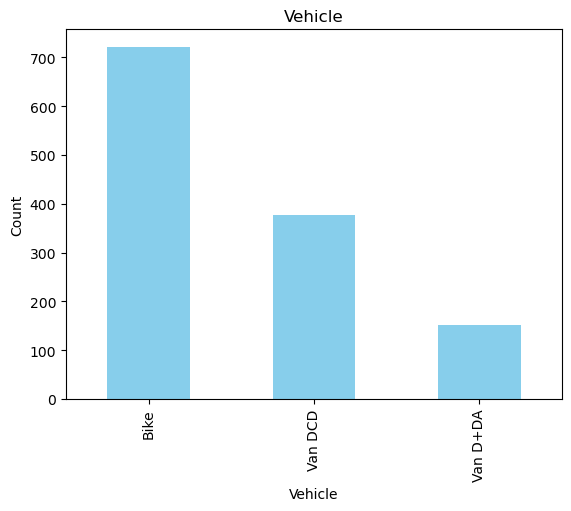

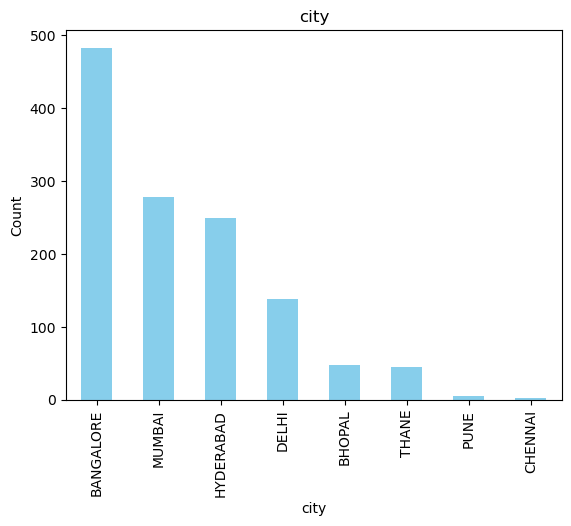

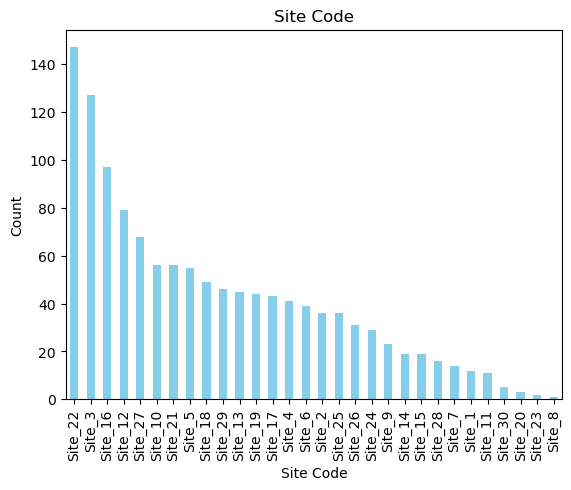

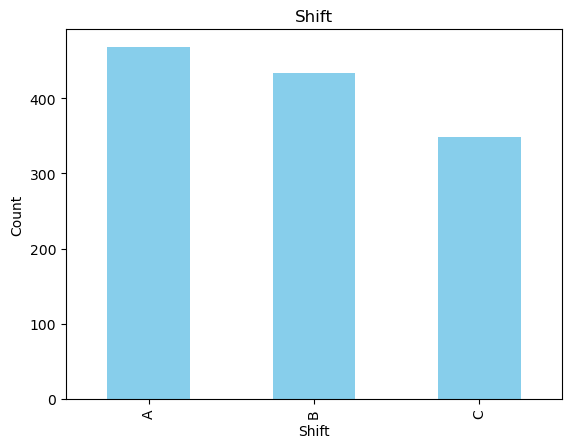

In [617]:
for i in cat_col:
    category_counts = monthly_df[i].value_counts()
    category_counts.plot(kind='bar', color='skyblue')

# Add labels and title
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(i)

# Show the plot
    plt.show()

#### Vehicle 
- Bike is the most used vehicle for deliveries and least is Van DD+DA

#### City
- Bangalure is the most delivered city

#### Site Code
- Site_22 is the most delivered site 

#### Shift
- Morning shitfs has more deliveries and evening shift has less

In [363]:
num_col = monthly_df.select_dtypes(include=np.number)

In [367]:
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
cluster,1249.0,4.016013,1.025195,1.00,4.00,4.00,4.00,6.0
Unsuccessful_Attempts,1249.0,23.419536,29.973575,0.00,3.00,11.00,32.00,183.0
Process_Deviations,1249.0,14.299440,76.128887,0.00,0.00,1.00,10.00,1946.0
Delivered,1249.0,307.368295,512.916184,0.00,39.00,118.00,377.00,6461.0
Customer_Rejects,1249.0,12.450761,19.190075,0.00,2.00,6.00,15.00,151.0
Picked_up_Customer_Returns,1249.0,91.841473,197.199058,0.00,5.00,21.00,68.00,1633.0
Picked up_Seller,1249.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
billing_amt,1249.0,11357.421137,13779.171890,448.00,1689.00,5579.00,14617.00,85019.0
Total Assigned,1249.0,435.080064,604.557576,1.00,69.00,200.00,585.00,7333.0
Productivity,1249.0,411.660528,586.492870,1.00,64.00,186.00,537.00,7317.0


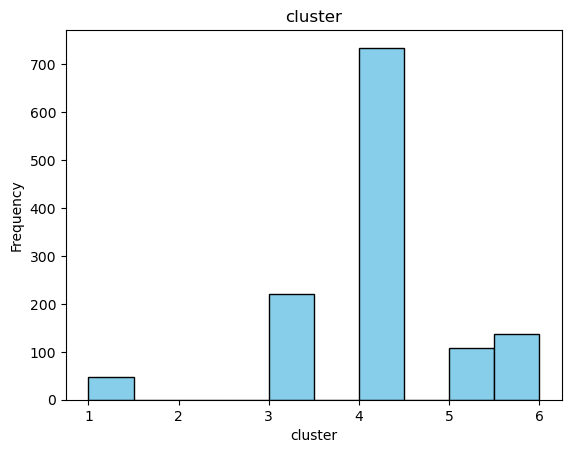

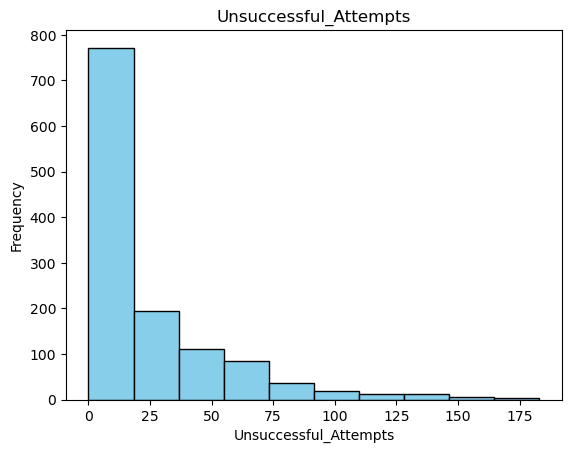

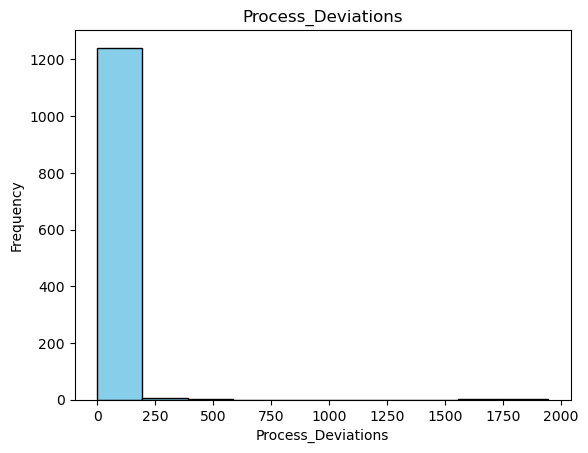

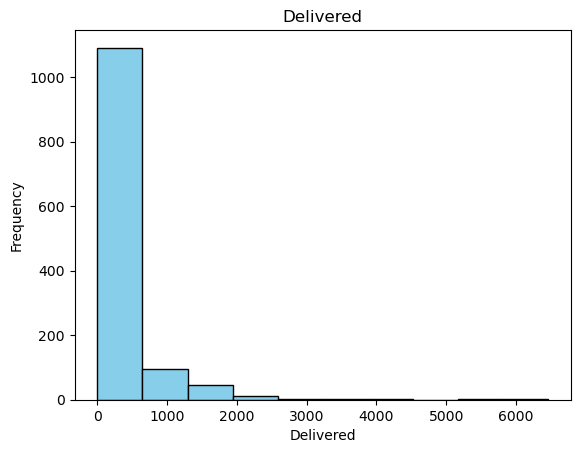

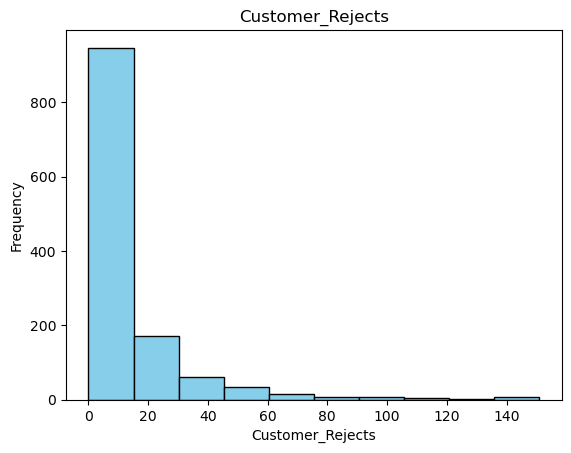

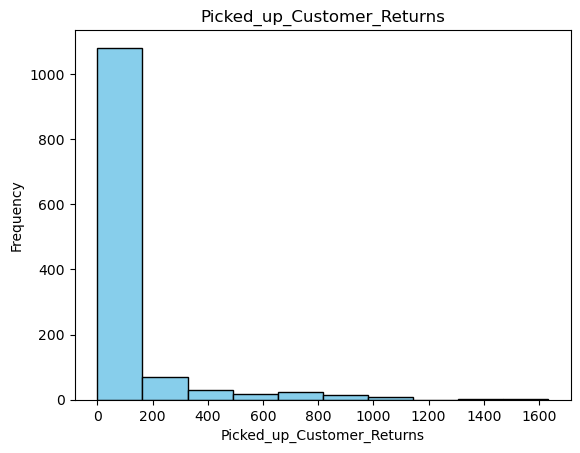

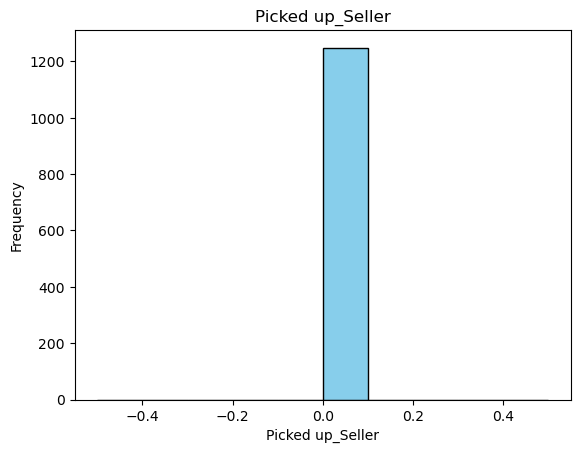

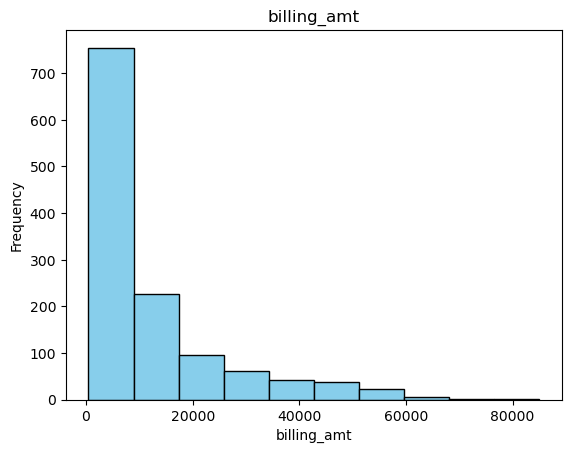

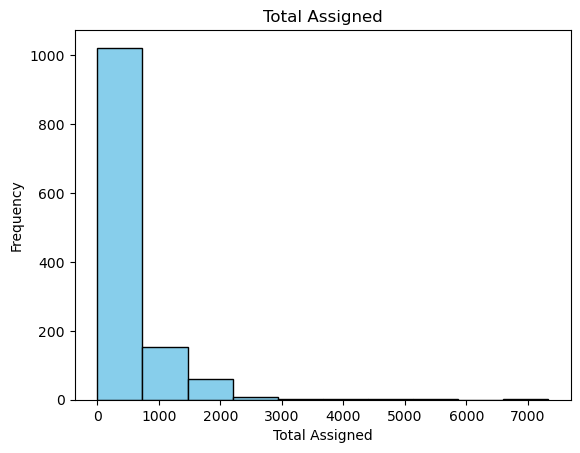

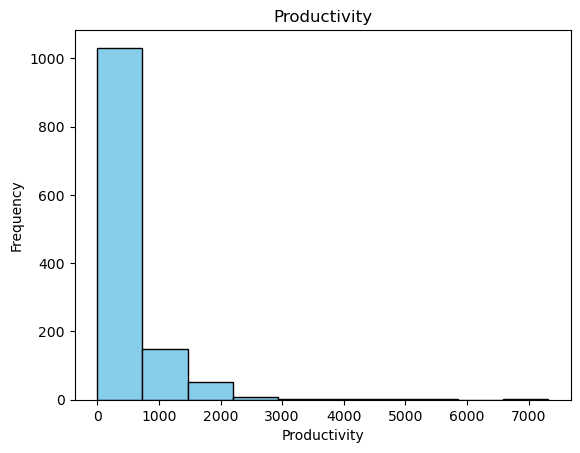

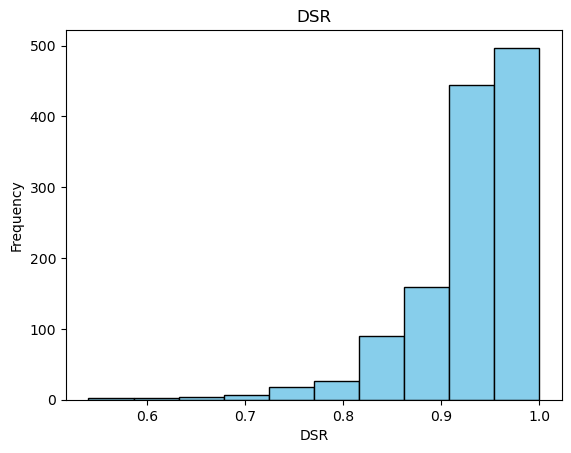

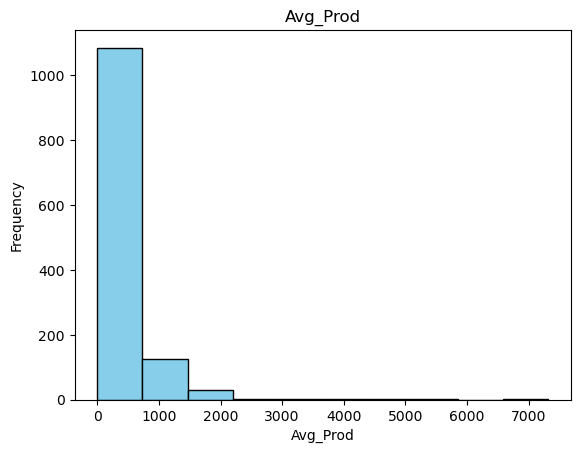

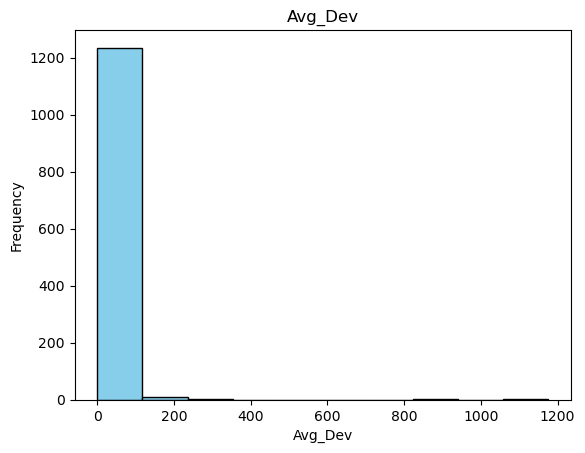

In [364]:
for i in num_col.columns:
    # Plot a histogram for the numerical column
    plt.hist(monthly_df[i], bins=10, color='skyblue', edgecolor='black')

    # Add labels and title
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(i)

    # Show the plot
    plt.show()

In [359]:
num_col.columns

Index(['cluster', 'Unsuccessful_Attempts', 'Process_Deviations', 'Delivered',
       'Customer_Rejects', 'Picked_up_Customer_Returns', 'Picked up_Seller',
       'billing_amt', 'Total Assigned', 'Productivity', 'Avg_Prod'],
      dtype='object')

- Most of the columns are left skewed and except DSR is right skewed

**Part-E**

Now that you have understood the distributions of the data in the monthly_df, you need to:

1.   Classify each agent on the basis of their DSR as either "DSR-ok" or "DSR-low"
2.   Classify each agent on the basis of the number of deviations they've had as either "deviations-ok" or "deviations-high"

This classification should be represented in two new columns in the monthly_df called "DSR Category" and "Deviations Category"

Note that DSR and Deviations are comparable across all vehicle types, all shifts and all geographical areas. For example - there is no valid reason for vans in Mumbai to have lower DSR or higher deviations when compared to bikes in Hyderabad or Banagalore or Pune. The same benchmark of quality applies to all vehicle types working all shifts in all cities.  

Once again, you are not being given any explicit thresholds to use for this classification. You are expected to use your analysis to decide the thresholds.

An effective solution would be one which identifies a smaller group of people that contribute to the largest part of the problem.


#### Solution 

#### DSR Classification
- From the table of descriptive stats of Numerical variables we can see that morethat 75% of agents has 90% and above DSR.
- The minimum DSR is 0.54 which means morethan half of the products are being delivered at minimum. 
- We can take a threshold between 80-90%, for this analysis sake i would go with the lower bound 80% DSR as threshold. 
- If an agent has morethan 80% DSR - 'DSR-ok' & lessthan 80% DSR - 'DSR-low'.

#### Deviation Classification
- From the table of descriptive stats of Numerical variables we can see that less than 25% of agents faced process devistions morethan 10. 
- Minimum is 0 and Maximum sees an outlier with morethan 1000.
- We can take 10 as our threshold for classifiying the Deviation
- If and agent has morethan 10 - deviations-ok lessthan 10 as deviations-high

In [652]:
DSR_Category = {}

for i in delivery_agents:
    if monthly_df[monthly_df['Delivery Agent ID']==i]['DSR'].mean()>0.80:
        DSR_Category[i]='DSR-ok'
    else:
        DSR_Category[i]='DSR-low'
    
Deviations_Category = {}

for i in delivery_agents:
    if monthly_df[monthly_df['Delivery Agent ID']==i]['Process_Deviations'].mean()<10:
        Deviations_Category[i]='deviations-ok'
    else:
        Deviations_Category[i]='deviations-low'

In [653]:
monthly_df['DSR Category'] = monthly_df['Delivery Agent ID'].map(DSR_Category)
monthly_df['Deviations Category'] = monthly_df['Delivery Agent ID'].map(Deviations_Category)
monthly_df.head()

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,DSR,Avg_Prod,Avg_Dev,DSR Category,Deviations Category
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,190,0,16900,762,735,0.96,343,11.67,DSR-ok,deviations-low
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,16,0,4223,212,199,0.94,343,11.67,DSR-ok,deviations-low
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,14,0,2471,103,97,0.94,343,11.67,DSR-ok,deviations-low
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,66,0,15819,524,475,0.91,345,6.50,DSR-ok,deviations-ok
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,7,0,10125,235,215,0.91,345,6.50,DSR-ok,deviations-ok


# Question 4

**Part-A**

Create a new dataframe that shows the number of A, B, and C shifts each delivery agent has done in the whole month. Also include in a separate column the total number of low productivity shifts each delivery agent has had in the whole month. Call this new dataframe "shifts_df". Make sure that there are no nan values in the new dataframe.

To be more clear, the new dataframe(shifts_df) should have the following columns:

* Delivery Agent ID
* Total no. of 'A' Shifts
* Total no. of 'B' Shifts
* Total no. of 'C' Shifts
* Total no. of low productivity shifts

#### Solution

In [654]:
agents = daily_df['Delivery Agent ID'].unique()

In [655]:
shift_sum = daily_df.groupby(['Delivery Agent ID','Shift']).count()['Date'].reset_index()

In [656]:
shift_df = shift_sum.pivot(index=['Delivery Agent ID'], columns='Shift', values='Date').reset_index()
shift_df.head()

Shift,Delivery Agent ID,A,B,C
0,DA_1,13.0,5.0,4.0
1,DA_10,8.0,7.0,NaN
2,DA_100,3.0,NaN,NaN
3,DA_101,21.0,1.0,NaN
4,DA_102,25.0,NaN,NaN


In [657]:
shift_df = shift_df.fillna(0)

In [658]:
shift_df.head()

Shift,Delivery Agent ID,A,B,C
0,DA_1,13.0,5.0,4.0
1,DA_10,8.0,7.0,0.0
2,DA_100,3.0,0.0,0.0
3,DA_101,21.0,1.0,0.0
4,DA_102,25.0,0.0,0.0


In [659]:
daily_df['Productivity_Category'].value_counts()

productivity-ok     10640
productivity-low      639
Name: Productivity_Category, dtype: int64

In [660]:
Prod_count = {}

for i in delivery_agents:
    
    count = daily_df[(daily_df['Delivery Agent ID']==i) & (daily_df['Productivity_Category']=='productivity-low')].count()['Shift']
    
    Prod_count[i]=count

In [661]:
shift_df['low productivity shifts'] = shift_df['Delivery Agent ID'].map(Prod_count)
shift_df.head()

Shift,Delivery Agent ID,A,B,C,low productivity shifts
0,DA_1,13.0,5.0,4.0,1
1,DA_10,8.0,7.0,0.0,0
2,DA_100,3.0,0.0,0.0,0
3,DA_101,21.0,1.0,0.0,0
4,DA_102,25.0,0.0,0.0,0


**Part B**

Merge the monthly_df and the shifts_df so that all the features are in one single dataframe. Call this new dataframe "final_df".

Then calculate and create a new column called "%_low_prod_shifts". For the values in this column divide the total number of low productivity shifts by the total no. of shifts worked and round the result to two decimal places.

In [662]:
final_df = pd.merge(monthly_df, shift_df, on='Delivery Agent ID', how='inner')

In [663]:
final_df.head()

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,...,Productivity,DSR,Avg_Prod,Avg_Dev,DSR Category,Deviations Category,A,B,C,low productivity shifts
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,...,735,0.96,343,11.67,DSR-ok,deviations-low,13.0,5.0,4.0,1
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,...,199,0.94,343,11.67,DSR-ok,deviations-low,13.0,5.0,4.0,1
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,...,97,0.94,343,11.67,DSR-ok,deviations-low,13.0,5.0,4.0,1
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,...,475,0.91,345,6.50,DSR-ok,deviations-ok,8.0,7.0,0.0,0
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,...,215,0.91,345,6.50,DSR-ok,deviations-ok,8.0,7.0,0.0,0


In [664]:
final_df['%_low_prod_shifts'] = round(final_df['low productivity shifts']/(final_df['A']+final_df['B']+final_df['C']),2)

In [665]:
final_df.head()

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,...,DSR,Avg_Prod,Avg_Dev,DSR Category,Deviations Category,A,B,C,low productivity shifts,%_low_prod_shifts
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,...,0.96,343,11.67,DSR-ok,deviations-low,13.0,5.0,4.0,1,0.05
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,...,0.94,343,11.67,DSR-ok,deviations-low,13.0,5.0,4.0,1,0.05
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,...,0.94,343,11.67,DSR-ok,deviations-low,13.0,5.0,4.0,1,0.05
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,...,0.91,345,6.50,DSR-ok,deviations-ok,8.0,7.0,0.0,0,0.00
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,...,0.91,345,6.50,DSR-ok,deviations-ok,8.0,7.0,0.0,0,0.00


**Part C**

Create three new columns - "%_shifts_A", "%_shifts_b", and "%_shifts_C".

If a delivery agent had a total of 10 shifts, and 5 out of them were Shift A, then "%_shifts_A" should be 0.5.

All values in the new columns should be rounded to 2 decimal places.

In [666]:
final_df['%_shifts_A'] = round(final_df['A']/(final_df['A']+final_df['B']+final_df['C']),2)

final_df['%_shifts_B'] = round(final_df['B']/(final_df['A']+final_df['B']+final_df['C']),2)

final_df['%_shifts_C'] = round(final_df['C']/(final_df['A']+final_df['B']+final_df['C']),2)

In [667]:
final_df

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,...,DSR Category,Deviations Category,A,B,C,low productivity shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,...,DSR-ok,deviations-low,13.0,5.0,4.0,1,0.05,0.59,0.23,0.18
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,...,DSR-ok,deviations-low,13.0,5.0,4.0,1,0.05,0.59,0.23,0.18
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,...,DSR-ok,deviations-low,13.0,5.0,4.0,1,0.05,0.59,0.23,0.18
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,...,DSR-ok,deviations-ok,8.0,7.0,0.0,0,0.00,0.53,0.47,0.00
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,...,DSR-ok,deviations-ok,8.0,7.0,0.0,0,0.00,0.53,0.47,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,DA_97,Van DCD,4,BANGALORE,Site_3,B,8,2,91,0,...,DSR-ok,deviations-low,22.0,3.0,0.0,0,0.00,0.88,0.12,0.00
1245,DA_98,Bike,3,THANE,Site_13,A,6,0,79,5,...,DSR-ok,deviations-ok,2.0,0.0,0.0,0,0.00,1.00,0.00,0.00
1246,DA_99,Bike,3,MUMBAI,Site_14,C,27,6,70,7,...,DSR-ok,deviations-ok,10.0,0.0,6.0,4,0.25,0.62,0.00,0.38
1247,DA_99,Bike,3,THANE,Site_13,A,33,0,383,38,...,DSR-ok,deviations-ok,10.0,0.0,6.0,4,0.25,0.62,0.00,0.38


# Question 5

**Part-A:**

*Irregularity:*

When we say a delivery agent is irregular to work, we mean that they were associated with us for a certain period, however, during this period they were absent frequently.

For example - A delivery agent's first day of work was 5th June and the last day of work was 25th June. However during this period, the agent worked for only 10 out of the possible 20 days. We would then say that this delivery agent is "irregular".

Let's look at another scenario where a delivery agent has worked for only 5 out of the possible 30 days in the whole month, and those 5 days are towards the end of the month, it probably means that they joined us late, and hence cannot be classified as "irreguar", and they should ideally be classified as "new".

Keeping this context in mind, classify each delivery agent in the dataset as "regular" or "irregular" or "new". This classification should be shown in a new dataframe called "regularity_df". This new dataframe should contain only two columns - "Delivery Agent ID" and "Regularity Classification"

In this question, we are not explicity prescribing the logic nor the threshold of working days to be used for this classification. You are expected to get creative and take a calculated decision on how to go about this.

Once all the delivery agents have been classified, explain the logic and reasoning behind the method you have chosen.

#### Solution

- The data has 30 days information starting from 1st june 2023 to 30th june 2023
- Let's consider if the employee has morethan 70% attendance then classify as regular and who are less than 30% of presence as new and who ever between 70 - 30% are irregular.

In [668]:
irregularity = {}

for i in delivery_agents:
    attandence_per = daily_df[daily_df['Delivery Agent ID']==i]['Date'].count()/30
    if attandence_per > 0.7:
        irregularity[i]='regular'
    elif attandence_per < 0.3:
        irregularity[i]='new'
    else:
        irregularity[i]='irregular'

In [669]:
regularity_df = pd.DataFrame(delivery_agents,columns = ['Delivery Agent ID'])

In [670]:
regularity_df['regularity'] = regularity_df['Delivery Agent ID'].map(irregularity)
regularity_df.head()

,Delivery Agent ID,regularity
0,DA_280,regular
1,DA_273,regular
2,DA_370,regular
3,DA_118,irregular
4,DA_136,regular


In [671]:
regularity_df.groupby('regularity').count()

,Delivery Agent ID
regularity,
irregular,230
new,176
regular,290


**Part-B**

Merge the regularity_df into the final_df so that all the features are available in one single dataframe.

In [672]:
final_df = pd.merge(final_df, regularity_df, on='Delivery Agent ID', how='inner')
final_df.head()

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,...,Deviations Category,A,B,C,low productivity shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C,regularity
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,...,deviations-low,13.0,5.0,4.0,1,0.05,0.59,0.23,0.18,regular
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,...,deviations-low,13.0,5.0,4.0,1,0.05,0.59,0.23,0.18,regular
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,...,deviations-low,13.0,5.0,4.0,1,0.05,0.59,0.23,0.18,regular
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,...,deviations-ok,8.0,7.0,0.0,0,0.00,0.53,0.47,0.00,irregular
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,...,deviations-ok,8.0,7.0,0.0,0,0.00,0.53,0.47,0.00,irregular


# Question 6

**Part-A**

Keeping in mind that the final_df contains a mix of categorical and numerical variables, find out if any of the features are correlated to each other using an appropriate method. Find out and report if any variables have a strong positive or negative correlation.

Explain which method(s) you have chosen and why.

In [673]:
df_corr = final_df.corr()

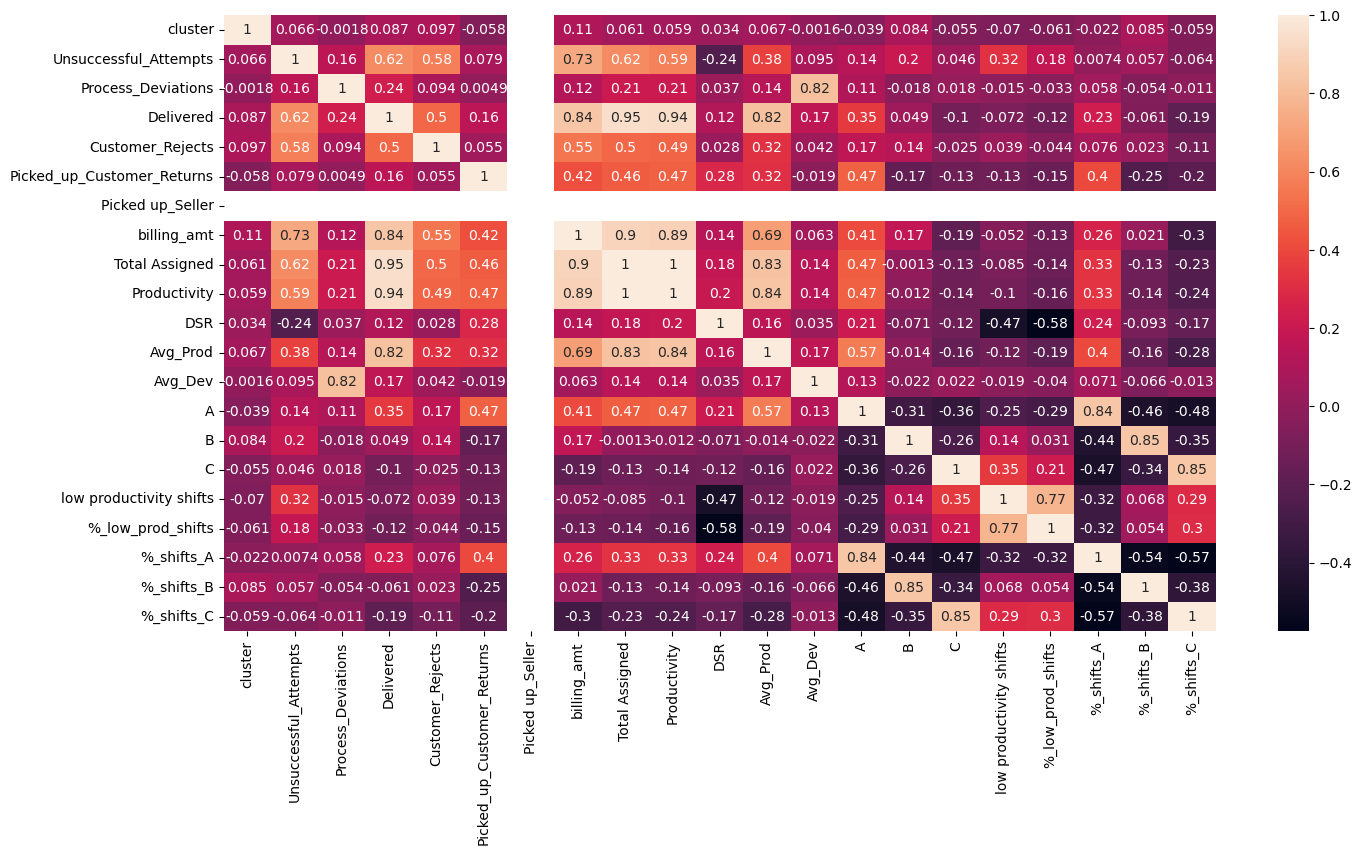

In [674]:
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, annot = True)
plt.show()

- We have used heat map technique which is a visual technique enables us to easily identify the variables which are correlated which are not.

- We can observe variables like 
    - Total Assigned, Productivity, Delivered, Avg prod
    - Avg prod, Delivered
    - Avg dev, process deviations
    - %_shifts of all A, B, C are correlated with A,B,C counts
    - unsuccessful attempts , billing amount
    
are positively correlated with morethan 75% of correlation

- we can also see variables like 
    - DSR, %_low_prod_shifts
    - %shift_A with %shift_B, %shift_C
    
are low negative correlated with with morethan 50% of correlartion

**Part-B**

Explain what you have gathered and understood about this data after having examined the correlations.

- Variables using which we derived new variables as a part of feature engineering led to correlation. 
ex: 
    
- **Total Assigned, Productivity, Delivered, Avg prod:**
We have derived productivity from total assigned and delivered and Avg prod from productivity, so obvisioly they have a linear relationship

- **Avg dev, process deviations:**
We have derived avg dev from process deviation and delivered so obvisioly they have a linear relationship
 
- **%_shifts of all A, B, C are correlated with A,B,C counts:**
We have derived %_shifts of all A, B, C from A,B,C and delivered so obvisioly they have a linear relationship
- We can remove some of these variables to reduce multicollinearity in the dataset
    - 

# Question 7

Following a comprehensive analysis of the final_df, the next phase involves categorizing delivery agents into distinct clusters. The primary aim of establishing these clusters is to uncover specific and noteworthy attributes within each group, enabling the formulation of targeted strategies for improvement.

In this scenario, the objective is to segment delivery agents into various groups, facilitating an understanding of which group requires enhancements in specific metrics. Typically, exceptional performing delivery agents exhibit elevated DSR (Delivery Success Rate), minimal deviations, heightened productivity, and consistent work attendance. Conversely, underperforming agents display contrasting characteristics. Furthermore, there will be individuals who fall within intermediate ranges.

During the creation of agent groups, it's essential to facilitate the breakdown into smaller subsets within the population. This breakdown aids in pinpointing precise factors contributing to subpar performance.

**Part-A**

* Keeping the context in mind, choose and implement a method to perform this grouping. Create a new column to indicate which group each delivery agent belongs to. Explain why you have chosen this method.
* How many groups have you chosen to create and why?
______________________________________________________________________________
*IMPORTANT NOTES:*
* You don't necessarily have to use every single feature for the grouping. You may choose to leave out some variables and explain why you have chosen to leave them out.

* Remember that the final_df contains several features which were created from original features in the raw data so that analysis and grouping becomes easier. Carefully go through all the features we currently have and discard what you think is not required when grouping on the basis of performance.

* Remember that performances are comparable across geographical areas. There is no reason to have different standards in different cities.

* You may choose to use hard coded rules for grouping the delivery agents (OR) you may even choose to use ML algorithms. Both approaches are valid as long as you are able to justify the logic and reasoning behind your approach.

* If you're finding it difficult to decide how many groups to divide them into, don't worry, this is common when dealing with data in the real world. Finding an appropriate solution requires trying out multiple approaches and analyzing results to select the method that seems to make most sense or fetches the highest scores on certain metrics.

In [675]:
final_df.head()

,Delivery Agent ID,Vehicle,cluster,city,Site Code,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,...,Deviations Category,A,B,C,low productivity shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C,regularity
0,DA_1,Bike,6,DELHI,Site_29,A,27,1,529,16,...,deviations-low,13.0,5.0,4.0,1,0.05,0.59,0.23,0.18,regular
1,DA_1,Bike,6,DELHI,Site_29,B,13,6,179,4,...,deviations-low,13.0,5.0,4.0,1,0.05,0.59,0.23,0.18,regular
2,DA_1,Bike,6,DELHI,Site_29,C,6,28,81,2,...,deviations-low,13.0,5.0,4.0,1,0.05,0.59,0.23,0.18,regular
3,DA_10,Van DCD,4,BANGALORE,Site_3,A,49,13,397,12,...,deviations-ok,8.0,7.0,0.0,0,0.00,0.53,0.47,0.00,irregular
4,DA_10,Van DCD,4,BANGALORE,Site_3,B,20,0,201,7,...,deviations-ok,8.0,7.0,0.0,0,0.00,0.53,0.47,0.00,irregular


#### Label Encoding Categorical variables 

In [676]:
final_cat_col = final_df.select_dtypes(include='object')

In [677]:
final_cat_col

,Delivery Agent ID,Vehicle,city,Site Code,Shift,DSR Category,Deviations Category,regularity
0,DA_1,Bike,DELHI,Site_29,A,DSR-ok,deviations-low,regular
1,DA_1,Bike,DELHI,Site_29,B,DSR-ok,deviations-low,regular
2,DA_1,Bike,DELHI,Site_29,C,DSR-ok,deviations-low,regular
3,DA_10,Van DCD,BANGALORE,Site_3,A,DSR-ok,deviations-ok,irregular
4,DA_10,Van DCD,BANGALORE,Site_3,B,DSR-ok,deviations-ok,irregular
...,...,...,...,...,...,...,...,...
1244,DA_97,Van DCD,BANGALORE,Site_3,B,DSR-ok,deviations-low,regular
1245,DA_98,Bike,THANE,Site_13,A,DSR-ok,deviations-ok,new
1246,DA_99,Bike,MUMBAI,Site_14,C,DSR-ok,deviations-ok,irregular
1247,DA_99,Bike,THANE,Site_13,A,DSR-ok,deviations-ok,irregular


In [678]:
final_cat_col['Site Code'] = final_cat_col['Site Code'].str.replace('Site_','')

In [679]:
final_cat_col['Site Code'].astype(int)

0       29
1       29
2       29
3        3
4        3
        ..
1244     3
1245    13
1246    14
1247    13
1248    13
Name: Site Code, Length: 1249, dtype: int32

In [680]:
final_cat_col['Delivery Agent ID'] = final_cat_col['Delivery Agent ID'].str.replace('DA_','')

In [681]:
final_cat_col['Delivery Agent ID'].astype(int)

0        1
1        1
2        1
3       10
4       10
        ..
1244    97
1245    98
1246    99
1247    99
1248    99
Name: Delivery Agent ID, Length: 1249, dtype: int32

In [682]:
Vehicle = {'Bike':1, 'Van DCD':2 ,'Van D+DA':3}
city = {'DELHI':1, 'BANGALORE':2, 'HYDERABAD':3,'MUMBAI':4, 'BHOPAL':5, 'THANE':6, 'PUNE':7,'CHENNAI':8}
Shift = {'A':1, 'B':2, 'C':3}
DSR_Category = {'DSR-ok':2,'DSR-low':1}
Deviations_Category = {'deviations-low':1, 'deviations-ok':2}
regularity = {'regular':1, 'irregular':2, 'new':3}

In [683]:
final_cat_col['Vehicle'] = final_cat_col['Vehicle'].map(Vehicle)

In [684]:
final_cat_col['city'] = final_cat_col['city'].map(city)

In [685]:
final_cat_col['Shift'] = final_cat_col['Shift'].map(Shift)

In [686]:
final_cat_col['DSR Category'] = final_cat_col['DSR Category'].map(DSR_Category)

In [687]:
final_cat_col['Deviations Category'] = final_cat_col['Deviations Category'].map(Deviations_Category)

In [688]:
final_cat_col['regularity'] = final_cat_col['regularity'].map(regularity)

#### Scalling Categorical variables 

#### Scalling Numerical variables 

In [691]:
final_num_col = final_df.select_dtypes(include='number')

In [692]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your feature matrix
scaler = MinMaxScaler()
final_num_col_scaled = scaler.fit_transform(final_num_col)


In [693]:
columns = ['cluster', 'Unsuccessful_Attempts', 'Process_Deviations', 'Delivered',
       'Customer_Rejects', 'Picked_up_Customer_Returns', 'Picked up_Seller',
       'billing_amt', 'Total Assigned', 'Productivity', 'DSR', 'Avg_Prod',
       'Avg_Dev', 'A', 'B', 'C', 'low productivity shifts',
       '%_low_prod_shifts', '%_shifts_A', '%_shifts_B', '%_shifts_C']

final_num_col_scaled = pd.DataFrame(final_num_col_scaled, columns=columns)

In [694]:
final_num_col_scaled.head()

,cluster,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,...,Avg_Prod,Avg_Dev,A,B,C,low productivity shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C
0,1.0,0.147541,0.000514,0.081876,0.105960,0.116350,0.0,0.194535,0.103792,0.100328,...,0.046747,0.009928,0.500000,0.178571,0.153846,0.066667,0.05,0.59,0.23,0.18
1,1.0,0.071038,0.003083,0.027705,0.026490,0.009798,0.0,0.044637,0.028778,0.027064,...,0.046747,0.009928,0.500000,0.178571,0.153846,0.066667,0.05,0.59,0.23,0.18
2,1.0,0.032787,0.014388,0.012537,0.013245,0.008573,0.0,0.023921,0.013912,0.013122,...,0.046747,0.009928,0.500000,0.178571,0.153846,0.066667,0.05,0.59,0.23,0.18
3,0.6,0.267760,0.006680,0.061446,0.079470,0.040416,0.0,0.181753,0.071331,0.064790,...,0.047020,0.005530,0.307692,0.250000,0.000000,0.000000,0.00,0.53,0.47,0.00
4,0.6,0.109290,0.000000,0.031110,0.046358,0.004287,0.0,0.114425,0.031915,0.029251,...,0.047020,0.005530,0.307692,0.250000,0.000000,0.000000,0.00,0.53,0.47,0.00


#### Joining Dataframes

In [701]:
final_scaled_df = pd.concat([final_cat_col,final_num_col_scaled],axis=1)

In [702]:
final_scaled_df.columns

Index(['Delivery Agent ID', 'Vehicle', 'city', 'Site Code', 'Shift',
       'DSR Category', 'Deviations Category', 'regularity', 'cluster',
       'Unsuccessful_Attempts', 'Process_Deviations', 'Delivered',
       'Customer_Rejects', 'Picked_up_Customer_Returns', 'Picked up_Seller',
       'billing_amt', 'Total Assigned', 'Productivity', 'DSR', 'Avg_Prod',
       'Avg_Dev', 'A', 'B', 'C', 'low productivity shifts',
       '%_low_prod_shifts', '%_shifts_A', '%_shifts_B', '%_shifts_C'],
      dtype='object')

In [703]:
final_scaled_df.drop('Delivery Agent ID', axis=1, inplace=True)

In [704]:
final_scaled_df.head()

,Vehicle,city,Site Code,Shift,DSR Category,Deviations Category,regularity,cluster,Unsuccessful_Attempts,Process_Deviations,...,Avg_Prod,Avg_Dev,A,B,C,low productivity shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C
0,1,1,29,1,2,1,1,1.0,0.147541,0.000514,...,0.046747,0.009928,0.500000,0.178571,0.153846,0.066667,0.05,0.59,0.23,0.18
1,1,1,29,2,2,1,1,1.0,0.071038,0.003083,...,0.046747,0.009928,0.500000,0.178571,0.153846,0.066667,0.05,0.59,0.23,0.18
2,1,1,29,3,2,1,1,1.0,0.032787,0.014388,...,0.046747,0.009928,0.500000,0.178571,0.153846,0.066667,0.05,0.59,0.23,0.18
3,2,2,3,1,2,2,2,0.6,0.267760,0.006680,...,0.047020,0.005530,0.307692,0.250000,0.000000,0.000000,0.00,0.53,0.47,0.00
4,2,2,3,2,2,2,2,0.6,0.109290,0.000000,...,0.047020,0.005530,0.307692,0.250000,0.000000,0.000000,0.00,0.53,0.47,0.00


#### Modelling

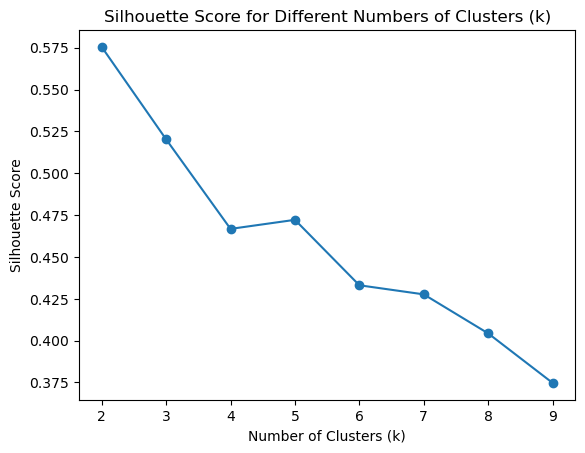

Optimal number of clusters (k): 2
   Vehicle  city Site Code  Shift  DSR Category  Deviations Category  \
0        1     1        29      1             2                    1   
1        1     1        29      2             2                    1   
2        1     1        29      3             2                    1   
3        2     2         3      1             2                    2   
4        2     2         3      2             2                    2   

   regularity  cluster  Unsuccessful_Attempts  Process_Deviations  ...  \
0           1      1.0               0.147541            0.000514  ...   
1           1      1.0               0.071038            0.003083  ...   
2           1      1.0               0.032787            0.014388  ...   
3           2      0.6               0.267760            0.006680  ...   
4           2      0.6               0.109290            0.000000  ...   

    Avg_Dev         A         B         C  low productivity shifts  \
0  0.009928  0.500

In [705]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


silhouette_scores = []
possible_k_values = range(2, 10) 
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(final_scaled_df)
    silhouette_avg = silhouette_score(final_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


optimal_k = possible_k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (k): {optimal_k}')


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_scaled_df['Cluster'] = kmeans.fit_predict(final_scaled_df)


print(final_scaled_df.head())

- We can see that the optimal number of clusters are two with a shilloutte score of 0.57
- As the cluster increasing we can see a steep fall in the score 

**Part-B**

Now that the delivery agents are grouped, explore the descriptive statistics or distributions across all the features of each group. Based on that, make your recommendations for what areas need to be improved for each group.

If you'd like to, you may use the same methods used in previous questions to explore distributions.

In [706]:
final_scaled_df.head()

,Vehicle,city,Site Code,Shift,DSR Category,Deviations Category,regularity,cluster,Unsuccessful_Attempts,Process_Deviations,...,Avg_Dev,A,B,C,low productivity shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C,Cluster
0,1,1,29,1,2,1,1,1.0,0.147541,0.000514,...,0.009928,0.500000,0.178571,0.153846,0.066667,0.05,0.59,0.23,0.18,1
1,1,1,29,2,2,1,1,1.0,0.071038,0.003083,...,0.009928,0.500000,0.178571,0.153846,0.066667,0.05,0.59,0.23,0.18,1
2,1,1,29,3,2,1,1,1.0,0.032787,0.014388,...,0.009928,0.500000,0.178571,0.153846,0.066667,0.05,0.59,0.23,0.18,1
3,2,2,3,1,2,2,2,0.6,0.267760,0.006680,...,0.005530,0.307692,0.250000,0.000000,0.000000,0.00,0.53,0.47,0.00,0
4,2,2,3,2,2,2,2,0.6,0.109290,0.000000,...,0.005530,0.307692,0.250000,0.000000,0.000000,0.00,0.53,0.47,0.00,0


In [707]:
final_scaled_df.describe()

,Vehicle,city,Shift,DSR Category,Deviations Category,regularity,cluster,Unsuccessful_Attempts,Process_Deviations,Delivered,...,Avg_Dev,A,B,C,low productivity shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C,Cluster
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,...,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,1.543635,2.823859,1.903923,1.979183,1.717374,1.794235,0.603203,0.127976,0.007348,0.047573,...,0.012165,0.295067,0.175083,0.160836,0.063944,0.062706,0.433411,0.303131,0.263411,0.553243
std,0.700201,1.266319,0.802875,0.142827,0.450456,0.762775,0.205039,0.163790,0.039121,0.079387,...,0.052828,0.327748,0.240792,0.262001,0.122226,0.119930,0.388704,0.344294,0.352422,0.497356
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.600000,0.016393,0.000000,0.006036,...,0.000425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,0.600000,0.060109,0.000514,0.018263,...,0.003122,0.153846,0.071429,0.038462,0.000000,0.000000,0.360000,0.140000,0.060000,1.000000
75%,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,0.600000,0.174863,0.005139,0.058350,...,0.009358,0.576923,0.214286,0.192308,0.066667,0.080000,0.830000,0.570000,0.440000,1.000000
max,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
